In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

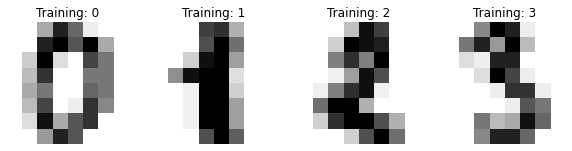

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=False
)

clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

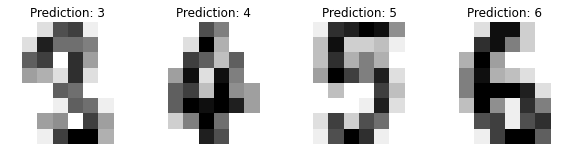

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.95      0.97      0.96       127
           2       0.98      0.97      0.98       122
           3       0.98      0.91      0.94       128
           4       0.98      0.96      0.97       128
           5       0.94      0.96      0.95       128
           6       0.99      0.98      0.98       128
           7       0.96      1.00      0.98       126
           8       0.93      0.93      0.93       121
           9       0.90      0.94      0.92       127

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[122   0   0   0   1   0   0   0   0   0]
 [  0 123   1   0   0   1   0   0   2   0]
 [  0   0 118   1   0   0   0   1   0   2]
 [  0   0   0 116   0   3   0   3   6   0]
 [  0   0   0   0 123   0   0   1   0   4]
 [  0   0   0   0   1 123   1   0   0   3]
 [  1   1   0   0   0   1 125   0   0   0]
 [  0   0   0   0   0   0   0 126   0   0]
 [  0   3   1   0   0   1   0   0 112   4]
 [  0   3   0   1   0   2   0   0   1 120]]


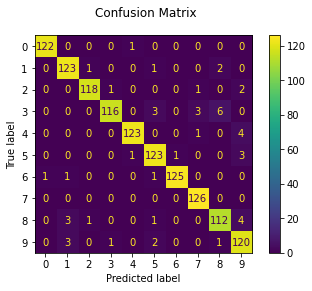

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()